In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
def normalize(data, lo, hi):
    return cv2.normalize(data, None, lo, hi, norm_type=cv2.NORM_MINMAX)

In [3]:
def imshow(image):
    image = normalize(image, 0, 255)
    plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))

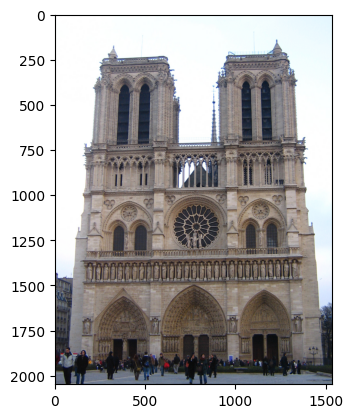

In [4]:
img_left = cv2.imread('1a_notredame.jpg')
imshow(img_left)

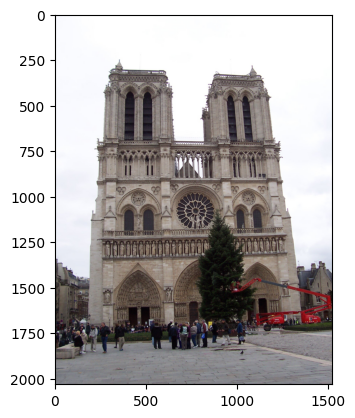

In [5]:
img_right = cv2.imread('1b_notredame.jpg')
imshow(img_right)

In [18]:
def sift_detect(image, n_keypoints):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create(n_keypoints)
    kp, descriptor = sift.detectAndCompute(gray, None)
    points = np.array([k.pt for k in kp])
    return kp, points, descriptor

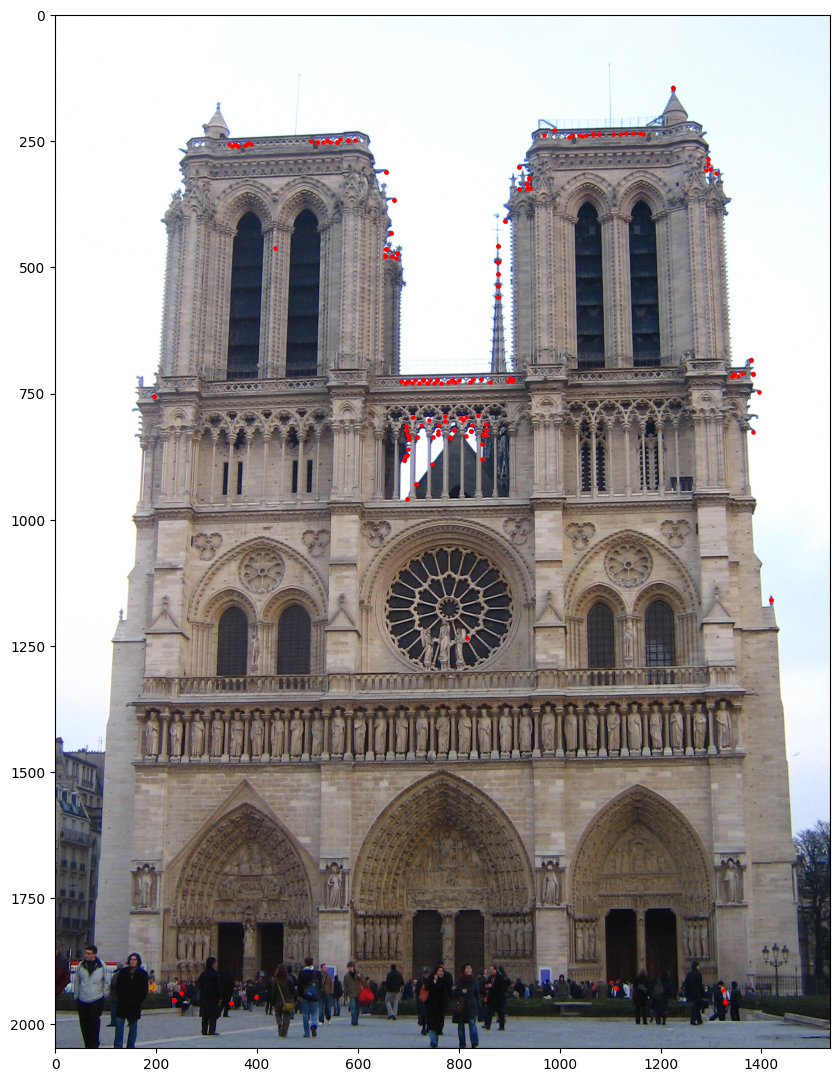

In [19]:
left_kp, left_point, left_desc = sift_detect(img_left, 200)
plt.figure(figsize=(10, 15))
imshow(img_left)
plt.scatter(left_point[:, 0], left_point[:, 1], c='r', s=5)

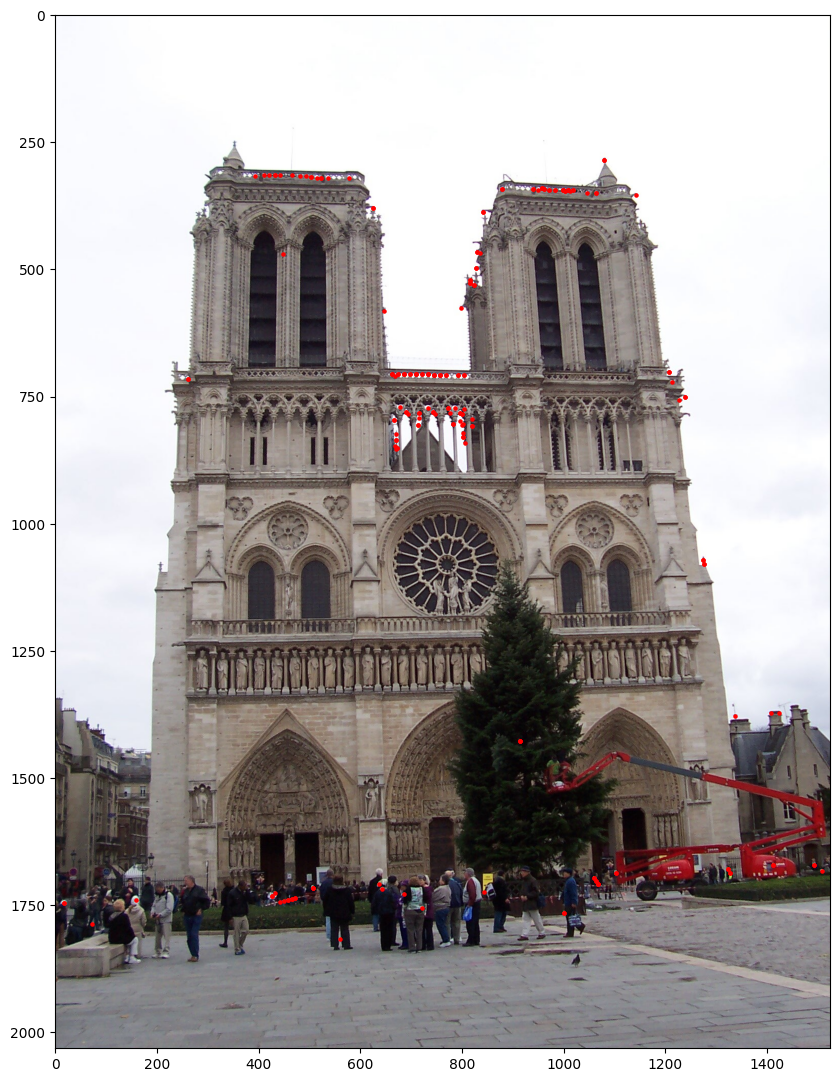

In [20]:
right_kp, right_point, right_desc = sift_detect(img_right, 200)
plt.figure(figsize=(10, 15))
imshow(img_right)
plt.scatter(right_point[:, 0], right_point[:, 1], c='r', s=5)

In [32]:
idx = []
for q, key in enumerate(left_point):
    distance = np.linalg.norm(key - right_point, axis=-1)
    t = np.argmin(distance)
    idx.append([cv2.DMatch(q, t, distance[t])])
    print(distance[t], t)

47.780084969753524 139
75.20141706907093 80
61.580005640415976 84
24.630709200670402 97
13.187345663179988 135
72.29296651235555 128
55.50116803476175 44
11.211089950116467 16
6.216148688429289 8
207.54041844117455 35
16.65868108217794 120
21.06992956215921 135
61.580005640415976 84
31.09175211086486 193
5.7689325274447105 17
29.16062972098959 121
30.115679878382483 177
33.037515902745426 57
62.02945160102531 84
33.037515902745426 57
29.16062972098959 121
36.26187544057069 8
29.359103869114534 193
20.21825315288403 37
29.359103869114534 193
16.19366560726819 125
16.19366560726819 125
98.02959768729914 80
75.69892547047967 82
18.843978008429666 144
75.69892547047967 82
66.17036613970085 41
66.17036613970085 41
12.57692312235304 152
18.843978008429666 144
67.7721465053179 79
34.89923183975235 8
8.058627448425248 72
63.216648695460385 80
18.843978008429666 144
93.78345553296981 80
109.54884114083688 130
46.095322341004014 70
34.89923183975235 8
37.28429376300011 8
109.54884114083688 130
4

In [33]:
idx = np.array(idx)

In [34]:
right_point[idx]

IndexError: arrays used as indices must be of integer (or boolean) type

In [36]:
img = cv2.drawMatchesKnn(img_left, left_kp, img_right, right_kp, idx, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

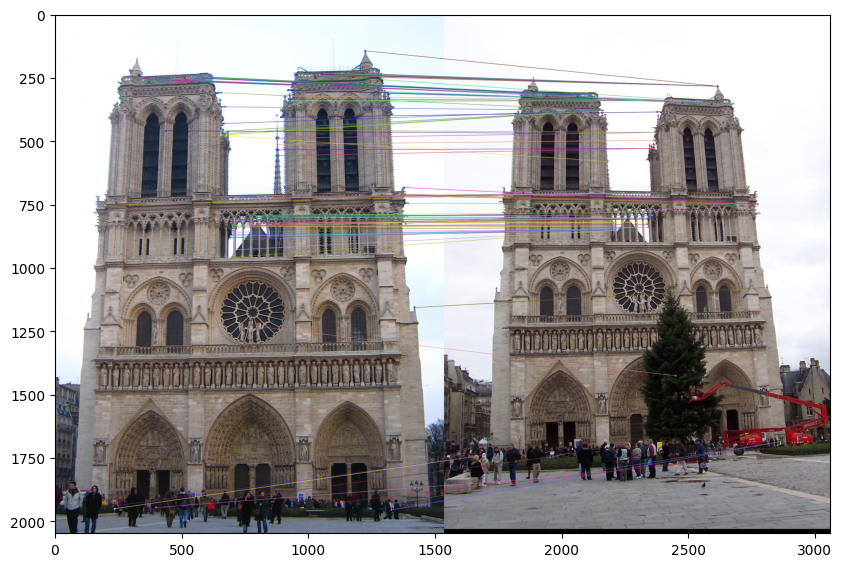

In [39]:
plt.figure(figsize=(10, 15))
imshow(img)